In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = open('mbti.txt',encoding='utf8')
mbti = file.read()

In [3]:
mbti

'WHO IS AN ADVOCATE (INFJ)?\n\nAn Advocate (INFJ) is someone with the Introverted, Intuitive, Feeling, and Judging personality traits. They tend to approach life with deep thoughtfulness and imagination. Their inner vision, personal values, and a quiet, principled version of humanism guide them in all things.\n\n“Treat people as if they were what they ought to be and you help them to become what they are capable of being.”\n\nJOHANN WOLFGANG VON GOETHE\nAdvocates are the rarest personality types of all. Still, Advocates leave their mark on the world. They have a deep sense of idealism and integrity, but they aren’t idle dreamers – they take concrete steps to realize their goals and make a lasting impact.\n\nAdvocates’ unique combination of personality traits makes them complex and quite versatile. For example, Advocates can speak with great passion and conviction, especially when standing up for their ideals. At other times, however, they may choose to be soft-spoken and understated, p

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

In [5]:
# sent_tokenize = 문장으로 끊기
sent_tokenize(mbti[:1000])[0:2] # 문장으로 끊은 것 중 2번째것까지 가지고 오기

['WHO IS AN ADVOCATE (INFJ)?',
 'An Advocate (INFJ) is someone with the Introverted, Intuitive, Feeling, and Judging personality traits.']

In [6]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [7]:
st1 = PorterStemmer()
lm = WordNetLemmatizer()

In [8]:
from nltk.tag import pos_tag
from nltk import Text

In [9]:
stopwords = ["to", "and", "they", "of", "a", "with","the",'may','can','in','this','that','tend','world','type']
stopwords
retokenize = RegexpTokenizer('[\w]+')
mbti_tokens = pos_tag(retokenize.tokenize(mbti))
mbti_tokens

[('WHO', 'WP'),
 ('IS', 'VBZ'),
 ('AN', 'NNP'),
 ('ADVOCATE', 'NNP'),
 ('INFJ', 'NNP'),
 ('An', 'DT'),
 ('Advocate', 'NNP'),
 ('INFJ', 'NNP'),
 ('is', 'VBZ'),
 ('someone', 'NN'),
 ('with', 'IN'),
 ('the', 'DT'),
 ('Introverted', 'NNP'),
 ('Intuitive', 'NNP'),
 ('Feeling', 'NNP'),
 ('and', 'CC'),
 ('Judging', 'NNP'),
 ('personality', 'NN'),
 ('traits', 'VBZ'),
 ('They', 'PRP'),
 ('tend', 'VBP'),
 ('to', 'TO'),
 ('approach', 'VB'),
 ('life', 'NN'),
 ('with', 'IN'),
 ('deep', 'JJ'),
 ('thoughtfulness', 'NN'),
 ('and', 'CC'),
 ('imagination', 'VB'),
 ('Their', 'NNP'),
 ('inner', 'NN'),
 ('vision', 'NN'),
 ('personal', 'JJ'),
 ('values', 'NNS'),
 ('and', 'CC'),
 ('a', 'DT'),
 ('quiet', 'JJ'),
 ('principled', 'JJ'),
 ('version', 'NN'),
 ('of', 'IN'),
 ('humanism', 'NN'),
 ('guide', 'VBP'),
 ('them', 'PRP'),
 ('in', 'IN'),
 ('all', 'DT'),
 ('things', 'NNS'),
 ('Treat', 'NNP'),
 ('people', 'NNS'),
 ('as', 'IN'),
 ('if', 'IN'),
 ('they', 'PRP'),
 ('were', 'VBD'),
 ('what', 'WP'),
 ('they', 'PRP

In [10]:
from nltk import FreqDist
names_list = [t[0] for t in mbti_tokens if t[1] == "NN" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [25]:
names_list[:5]

['someone', 'personality', 'life', 'thoughtfulness', 'inner']

In [23]:
type(fd_names)

nltk.probability.FreqDist

In [11]:
fd_names.N()

71

In [12]:
fd_names['care']

4

In [13]:
fd_names.freq('care')

0.056338028169014086

In [14]:
fd_names.most_common(5)

[('personality', 7), ('care', 4), ('someone', 2), ('life', 2), ('vision', 2)]

In [34]:
all_str = ""
for x in names_list:
    all_str += x + " "

In [31]:
# all_str = all_str.join(names_list)

In [35]:
print(all_str)

someone personality life thoughtfulness inner vision version humanism personality mark sense idealism integrity impact combination personality versatile example passion conviction preferring peace thing personality creativity imagination sensitivity compassion egalitarianism karma deal personality purpose life injustice altruism gain result someone personality society hope hardship Nothing solution way honesty insight impression value care time recharge Cost care vision success mindset personality face conflict criticism appreciate criticism mission inequity unfairness movement matter care care 


In [36]:
text = Text(retokenize.tokenize(all_str))
text

<Text: someone personality life thoughtfulness inner vision version humanism...>

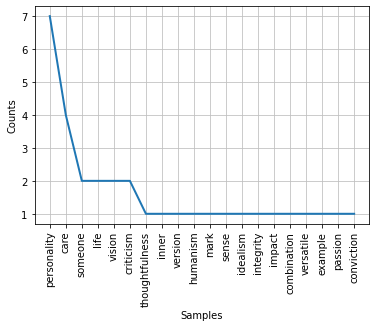

In [37]:
text.plot(20)

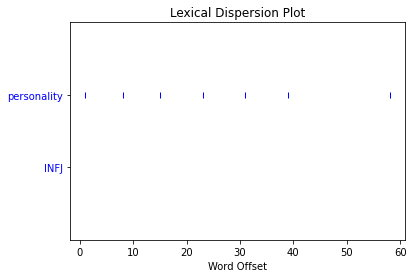

In [38]:
text.dispersion_plot(["personality","INFJ"])

In [39]:
text.concordance('personality')

Displaying 7 of 7 matches:
someone personality life thoughtfulness inner vision 
ess inner vision version humanism personality mark sense idealism integrity imp
lism integrity impact combination personality versatile example passion convict
conviction preferring peace thing personality creativity imagination sensitivit
passion egalitarianism karma deal personality purpose life injustice altruism g
tice altruism gain result someone personality society hope hardship Nothing sol
 Cost care vision success mindset personality face conflict criticism appreciat


In [40]:
from wordcloud import WordCloud

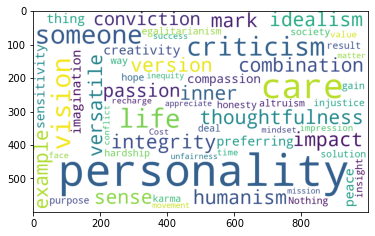

In [41]:
wc = WordCloud(width=1000,height=600, background_color='white',random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))